# Insights into the Apartment Rental Market: Exploring Trends and Predicting Rental Prices

In [138]:
%matplotlib inline

In [224]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
from scipy.stats import norm
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns

## 01. Data Collection

### Introduction - Data Collection:

In the ever-evolving real estate landscape, the availability of data plays a crucial role in understanding the dynamics of the rental market. This data science project aims to analyze and gain insights from a comprehensive dataset on apartments available for rent. To achieve this, we will collect data from the provided dataset hosted on the UCI Machine Learning Repository.

In [140]:
dataset_path = 'data/apartments_for_rent_in_USA.csv'

try:
    apartments_usa = pd.read_csv(dataset_path, sep=";", encoding='cp1252')
    print(apartments_usa.head(5))
except Exception as e:
    print("Error reading the dataset:", e)

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [141]:
dataset_path = 'data/apartments_for_rent_in_GERMANY.csv'

try:
    apartments_de = pd.read_csv(dataset_path)
    print(apartments_de.head(5))
except Exception as e:
    print("Error reading the dataset:", e)

                regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  ...               regio2  \
0        4.

### Dataset Source:

The dataset we will be working with is sourced from the UCI Machine Learning Repository and is specifically focused on apartment rentals. The dataset comprises a diverse range of attributes associated with apartments, including details about their location, physical characteristics, amenities, and, most importantly, their rental prices. This collection of information presents an exciting opportunity to explore and uncover patterns that influence rental pricing, identify key features that drive value, and ultimately, offer valuable insights to both landlords and prospective tenants.

### Data Collection Process:

The data collection process involves accessing the dataset from the UCI repository, ensuring its integrity, and loading it into our Python environment using the powerful data manipulation library, Pandas. By following stringent data collection procedures, we ensure that the dataset is clean, reliable, and appropriate for analysis.

## 02. Data Understanding and Exploration

Understanding and exploring the dataset are crucial steps in any data science project. In this phase, we will dive deep into the dataset obtained during the data collection phase. By thoroughly understanding the data's structure, quality, and relationships between variables, we can lay a solid foundation for further analysis and model building.

### 01.Data Overview

This is a load the dataset into a Pandas DataFrame and examine its dimensions (number of rows and columns).

In [142]:
apartments_usa.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [143]:
apartments_de.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

I need to see dimensions of my datasets

In [144]:
apartments_usa.shape

(10000, 22)

In [145]:
apartments_de.shape

(268850, 49)

This are first five rows of datasets to see data structure and content

In [146]:
apartments_usa.head(5)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [147]:
apartments_de.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


My datasets column names

In [148]:
apartments_usa.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [149]:
apartments_de.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

I will use `df.info()` to obtain information about the data types of each column and check for any missing values.

In [150]:
apartments_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [151]:
apartments_de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

I will generate descriptive statistics using `df.describe()` to gain insights into the central tendencies, spread, and distributions of numerical variables.

In [152]:
apartments_usa.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [153]:
apartments_de.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [154]:
apartments_usa.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5.623396e+09,7.021025e+07,5.508654e+09,5.509248e+09,5.668610e+09,5.668626e+09,5.668663e+09
bathrooms,9966.0,1.380544e+00,6.154099e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.500000e+00
bedrooms,9993.0,1.744021e+00,9.423539e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
price,10000.0,1.486277e+03,1.076508e+03,2.000000e+02,9.490000e+02,1.270000e+03,1.695000e+03,5.250000e+04
square_feet,10000.0,9.458105e+02,6.557557e+02,1.010000e+02,6.490000e+02,8.020000e+02,1.100000e+03,4.000000e+04
latitude,9990.0,3.769516e+01,5.495851e+00,2.131550e+01,3.367985e+01,3.880980e+01,4.134980e+01,6.159400e+01
longitude,9990.0,-9.465225e+01,1.575980e+01,-1.580221e+02,-1.013017e+02,-9.365160e+01,-8.220998e+01,-7.019160e+01
time,10000.0,1.574891e+09,3.762395e+06,1.568744e+09,1.568781e+09,1.577358e+09,1.577359e+09,1.577362e+09


In [155]:
apartments_de.describe().T

,count,mean,std,min,25%,50%,75%,max
serviceCharge,261941.0,1.512061e+02,3.082958e+02,0.000000e+00,9.500000e+01,1.350000e+02,1.900000e+02,1.461180e+05
telekomHybridUploadSpeed,45020.0,1.000000e+01,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
picturecount,268850.0,9.791958e+00,6.408399e+00,0.000000e+00,6.000000e+00,9.000000e+00,1.300000e+01,1.210000e+02
pricetrend,267018.0,3.389001e+00,1.964874e+00,-1.233000e+01,2.000000e+00,3.390000e+00,4.570000e+00,1.492000e+01
telekomUploadSpeed,235492.0,2.880493e+01,1.633715e+01,1.000000e+00,1.000000e+01,4.000000e+01,4.000000e+01,1.000000e+02
totalRent,228333.0,9.013315e+02,3.323833e+04,0.000000e+00,4.698000e+02,6.500000e+02,9.850000e+02,1.575154e+07
yearConstructed,211805.0,1.966401e+03,4.699221e+01,1.000000e+03,1.950000e+03,1.973000e+03,1.996000e+03,2.090000e+03
scoutId,268850.0,1.069697e+08,1.250093e+07,2.887174e+07,1.066910e+08,1.111584e+08,1.137688e+08,1.157117e+08
noParkSpaces,93052.0,1.327634e+00,8.361403e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.241000e+03
yearConstructedRange,211805.0,3.714544e+00,2.738134e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,9.000000e+00


## 03. Data Cleaning and Preprocessing

Data cleaning and preprocessing are essential steps to ensure that the dataset is suitable for analysis and model building. In this phase, we will address any data quality issues, handle missing values, and prepare the dataset for further exploration and modeling.

Here I will Identify columns with missing values using `df.isnull().sum()` to understand the extent of missing data.

In [156]:
apartments_usa.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

The code apartments_usa.isnull().sum() calculates the number of missing values (NaN) in each column of the DataFrame apartments_usa, providing a count of how many missing values exist in each column. This helps identify the extent of missing data and assess data quality.

In [157]:
apartments_de.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

The code apartments_de.isnull().sum() performs a similar operation by counting the number of missing values (NaN) in each column of the DataFrame apartments_de, revealing the extent of missing data for each column in the dataset focused on apartments in Germany.

In this phase, we focus on ensuring the dataset is well-structured, relevant, and free from unnecessary clutter. By removing specific columns that add little value or are redundant, we streamline the data for further analysis and model building. Based on the objectives and context of your analysis, i will remove some columns that are not relevant or contribute minimally to the project. This include columns with excessive missing values or redundant information.

In [158]:
columns_to_remove_usa = ['id', 'category', 'body', 'fee', 'has_photo', 'price_display', 'address', 'time']
new_apartments_usa = apartments_usa.drop(columns=columns_to_remove_usa)

The provided code removes certain columns ('id', 'category', 'body', 'fee', 'has_photo', 'price_display', 'address', 'time') from a DataFrame containing information about apartments in the USA. The resulting DataFrame, named new_apartments_usa, is streamlined and excludes these specific columns. This can help in focusing the analysis on relevant features and reducing unnecessary information.

In [159]:
columns_to_remove_de = [
    'serviceCharge',
    'telekomTvOffer',
    'telekomHybridUploadSpeed',
    'newlyConst',
    'picturecount',
    'telekomUploadSpeed',
    'heatingCosts',
    'energyEfficiencyClass',
    'lastRefurbish',
    'date',
    'electricityKwhPrice',
    'electricityBasePrice',
    'facilities',
    'scoutId',
    'heatingType',
    'yearConstructed',
    'firingTypes',
    'yearConstructedRange',
    'regio2',
    'regio3',
    'description',
    'geo_bln',
    'pricetrend',
    'houseNumber',
    'geo_krs',
    'condition',
    'noParkSpaces',
    'interiorQual',
    'street',
    'streetPlain',
    'baseRentRange',
    'thermalChar',
    'livingSpaceRange',
    'noRoomsRange',
    ]
new_apartments_de = apartments_de.drop(columns=columns_to_remove_de)

The provided code removes a set of specific columns from a DataFrame containing information about apartments in Germany. The columns to be removed include features such as service charges, TV offers, heating costs, energy efficiency details, and various descriptive and location-related attributes. The resulting DataFrame, named new_apartments_de, is a refined version of the original dataset, focusing on key features relevant to apartments in Germany. This can aid in data analysis by excluding less pertinent information and streamlining the dataset for specific research purposes.

In [160]:
new_apartments_usa

,title,amenities,bathrooms,bedrooms,currency,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...",NaN,NaN,0.0,USD,NaN,790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo
1,Studio apartment 814 Schutte Road,NaN,NaN,1.0,USD,NaN,425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo
2,"Studio apartment N Scott St, 14th St N, Arling...",NaN,1.0,0.0,USD,NaN,1390,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo
3,Studio apartment 1717 12th Ave,NaN,1.0,0.0,USD,NaN,925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo
4,"Studio apartment Washington Blvd, N Cleveland ...",NaN,NaN,0.0,USD,NaN,880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Five BR 5407 Abbott Place - Abbott,NaN,4.0,5.0,USD,NaN,6000,Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo
9996,Six BR 256 Las Entradas,NaN,8.0,6.0,USD,NaN,25000,Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo
9997,Six BR 9908 Bentcross Drive,NaN,8.5,6.0,USD,NaN,11000,Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo
9998,One BR in New York NY 10069,"Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,NaN,4790,Monthly,40000,New York,NY,40.7716,-73.9876,Listanza


In [161]:
new_apartments_de

,regio1,balcony,totalRent,hasKitchen,cellar,baseRent,livingSpace,petsAllowed,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden
0,Nordrhein_Westfalen,False,840.0,False,True,595.0,86.00,NaN,False,ground_floor,44269,4.0,1.0,3.0,True
1,Rheinland_Pfalz,True,NaN,False,False,800.0,89.00,no,False,ground_floor,67459,3.0,NaN,NaN,False
2,Sachsen,True,1300.0,False,True,965.0,83.80,NaN,True,apartment,1097,3.0,3.0,4.0,False
3,Sachsen,True,NaN,False,False,343.0,58.15,NaN,False,other,9599,3.0,3.0,NaN,False
4,Bremen,True,903.0,False,False,765.0,84.97,NaN,False,apartment,28213,3.0,1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,True,910.0,False,True,820.0,90.00,no,False,roof_storey,82390,3.0,NaN,NaN,False
268846,Hessen,True,1150.0,True,False,930.0,115.00,negotiable,False,apartment,68519,3.5,1.0,1.0,False
268847,Hessen,True,930.0,False,True,650.0,95.00,negotiable,False,apartment,65552,4.0,1.0,2.0,True
268848,Nordrhein_Westfalen,True,1015.0,False,True,840.0,70.00,no,True,apartment,51069,2.0,NaN,5.0,False


Checking columns type

In [162]:
new_apartments_usa.dtypes

title            object
amenities        object
bathrooms       float64
bedrooms        float64
currency         object
pets_allowed     object
price             int64
price_type       object
square_feet       int64
cityname         object
state            object
latitude        float64
longitude       float64
source           object
dtype: object

In [163]:
new_apartments_de.dtypes

regio1             object
balcony              bool
totalRent         float64
hasKitchen           bool
cellar               bool
baseRent          float64
livingSpace       float64
petsAllowed        object
lift                 bool
typeOfFlat         object
geo_plz             int64
noRooms           float64
floor             float64
numberOfFloors    float64
garden               bool
dtype: object

I will use the `astype()` method to explicitly convert the columns to the "string" data type (str).

In [164]:
new_apartments_usa['title'] = new_apartments_usa['title'].astype('string')
new_apartments_usa['amenities'] = new_apartments_usa['amenities'].astype('string')
new_apartments_usa['cityname'] = new_apartments_usa['cityname'].astype('string')
new_apartments_usa['state'] = new_apartments_usa['state'].astype('string')
new_apartments_usa['source'] = new_apartments_usa['source'].astype('string')

In [165]:
new_apartments_de['regio1'] = new_apartments_de['regio1'].astype('string')
new_apartments_de['petsAllowed'] = new_apartments_de['petsAllowed'].astype('string')
new_apartments_de['typeOfFlat'] = new_apartments_de['typeOfFlat'].astype('string')

In [166]:
new_apartments_usa

,title,amenities,bathrooms,bedrooms,currency,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...",<NA>,NaN,0.0,USD,NaN,790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo
1,Studio apartment 814 Schutte Road,<NA>,NaN,1.0,USD,NaN,425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo
2,"Studio apartment N Scott St, 14th St N, Arling...",<NA>,1.0,0.0,USD,NaN,1390,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo
3,Studio apartment 1717 12th Ave,<NA>,1.0,0.0,USD,NaN,925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo
4,"Studio apartment Washington Blvd, N Cleveland ...",<NA>,NaN,0.0,USD,NaN,880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Five BR 5407 Abbott Place - Abbott,<NA>,4.0,5.0,USD,NaN,6000,Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo
9996,Six BR 256 Las Entradas,<NA>,8.0,6.0,USD,NaN,25000,Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo
9997,Six BR 9908 Bentcross Drive,<NA>,8.5,6.0,USD,NaN,11000,Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo
9998,One BR in New York NY 10069,"Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,NaN,4790,Monthly,40000,New York,NY,40.7716,-73.9876,Listanza


In [167]:
new_apartments_de

,regio1,balcony,totalRent,hasKitchen,cellar,baseRent,livingSpace,petsAllowed,lift,typeOfFlat,geo_plz,noRooms,floor,numberOfFloors,garden
0,Nordrhein_Westfalen,False,840.0,False,True,595.0,86.00,<NA>,False,ground_floor,44269,4.0,1.0,3.0,True
1,Rheinland_Pfalz,True,NaN,False,False,800.0,89.00,no,False,ground_floor,67459,3.0,NaN,NaN,False
2,Sachsen,True,1300.0,False,True,965.0,83.80,<NA>,True,apartment,1097,3.0,3.0,4.0,False
3,Sachsen,True,NaN,False,False,343.0,58.15,<NA>,False,other,9599,3.0,3.0,NaN,False
4,Bremen,True,903.0,False,False,765.0,84.97,<NA>,False,apartment,28213,3.0,1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,True,910.0,False,True,820.0,90.00,no,False,roof_storey,82390,3.0,NaN,NaN,False
268846,Hessen,True,1150.0,True,False,930.0,115.00,negotiable,False,apartment,68519,3.5,1.0,1.0,False
268847,Hessen,True,930.0,False,True,650.0,95.00,negotiable,False,apartment,65552,4.0,1.0,2.0,True
268848,Nordrhein_Westfalen,True,1015.0,False,True,840.0,70.00,no,True,apartment,51069,2.0,NaN,5.0,False


In [168]:
new_apartments_usa.dtypes

title           string[python]
amenities       string[python]
bathrooms              float64
bedrooms               float64
currency                object
pets_allowed            object
price                    int64
price_type              object
square_feet              int64
cityname        string[python]
state           string[python]
latitude               float64
longitude              float64
source          string[python]
dtype: object

The code `new_apartments_usa.dtypes` displays the data types of the columns in the DataFrame `new_apartments_usa`, providing insights into how the data is stored and represented.

In [169]:
new_apartments_de.dtypes

regio1            string[python]
balcony                     bool
totalRent                float64
hasKitchen                  bool
cellar                      bool
baseRent                 float64
livingSpace              float64
petsAllowed       string[python]
lift                        bool
typeOfFlat        string[python]
geo_plz                    int64
noRooms                  float64
floor                    float64
numberOfFloors           float64
garden                      bool
dtype: object

The code new_apartments_de.dtypes reveals the data types of the columns in the DataFrame new_apartments_de, offering information about the data storage and formats used in the dataset focused on apartments in Germany.

## 04. Data Visualization:

Data visualization is a powerful tool that allows us to gain insights, identify patterns, and communicate findings effectively. In this phase, we will create various visualizations to explore and understand the dataset's characteristics, relationships, and distributions.

### USA Visualization

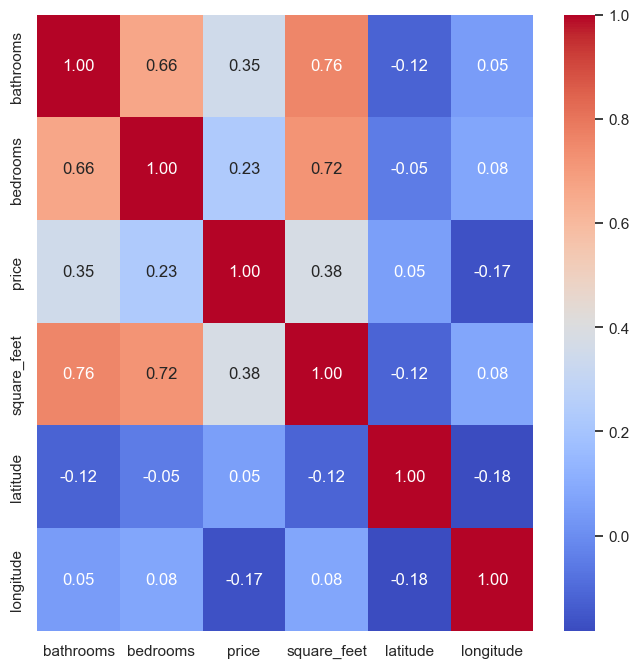

In [229]:
numeric_columns = new_apartments_usa.select_dtypes(include=['float64', 'int64'])

f, ax = plt.subplots(figsize=(8, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.show()

Heatmap Description: Numeric Correlations in 'new_apartments_usa'

The heatmap visualizes correlations between numeric columns in the 'new_apartments_usa' dataset. Each cell displays a correlation coefficient, indicating the strength and direction of relationships. Darker colors denote stronger correlations (positive or negative). Key takeaways include identifying variables that tend to move together or in opposite directions. This aids in understanding interdependencies within apartment listing attributes, assisting in decision-making and model building.

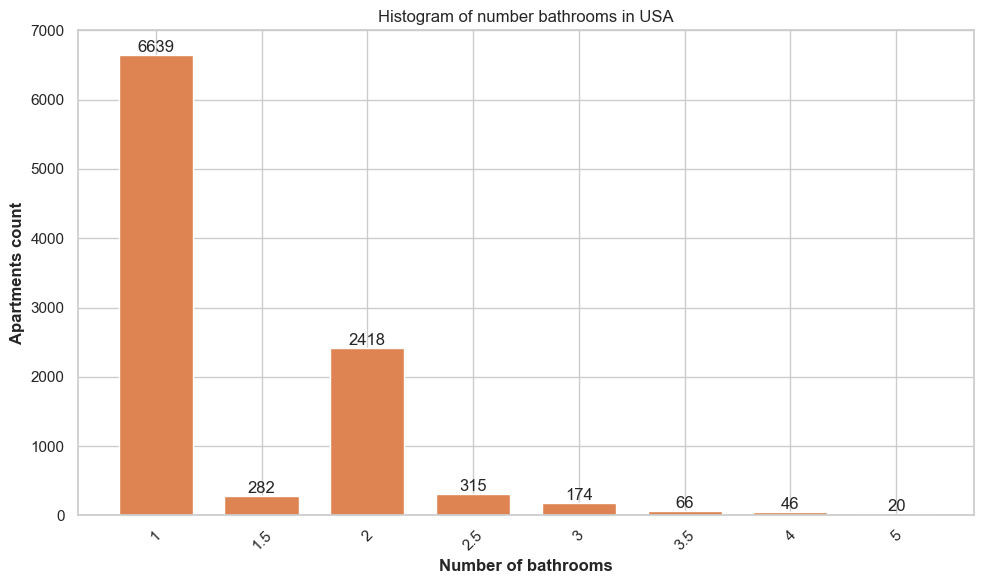

In [170]:
bathrooms = new_apartments_usa["bathrooms"]
bathrooms_no_zeros = bathrooms[bathrooms != 0]

bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
bar_width = 0.7

plt.figure(figsize=(10, 6))
plt.hist(bathrooms_no_zeros, bins=bins, align='mid', rwidth=bar_width, range=(1, 5), weights=[1] * len(bathrooms_no_zeros))

plt.title('Histogram of number bathrooms in USA')
plt.xlabel("Number of bathrooms", fontweight='bold')
plt.ylabel("Apartments count", fontweight='bold')
plt.ylim(0, 7000)

bin_heights, bin_edges, _ = plt.hist(bathrooms_no_zeros, bins=bins, align='mid', rwidth=bar_width, range=(1, 5))
custom_ticks = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]

custom_labels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 5]
plt.xticks(custom_ticks, custom_labels, rotation=45)

for i in range(len(bin_heights)):
    x = (bin_edges[i] + bin_edges[i + 1]) / 2
    y = bin_heights[i]
    plt.text(x, y, str(int(bin_heights[i])), ha='center', va='bottom')

plt.tight_layout()
plt.show()

The provided code generates a histogram that visualizes the distribution of the number of bathrooms in apartments across the USA. The x-axis represents the number of bathrooms, while the y-axis displays the count of apartments in each bathroom category.

The histogram is constructed using a customized set of bins, specifically [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], to capture the range of bathroom counts with increased granularity. The width of the bars is controlled using `bar_width = 0.7`.

The title "Histogram of Number of Bathrooms in USA" provides context to the plot, and the x-axis label "Number of bathrooms" and y-axis label "Apartments count" provide clarity to the axes.

The histogram effectively reveals the distribution of apartments based on the number of bathrooms. From the provided results, there are 6639 apartments with 1 bathroom, 2418 apartments with two bathrooms, 174 apartments with three bathrooms, 46 apartments with four bathrooms, and 20 apartments with five bathrooms. These figures offer insights into common bathroom configurations in apartments across the dataset.

Text annotations on top of each bar display the exact count of apartments for each bathroom category, enhancing the readability of the visualization.

The histogram aids in understanding the popularity of various bathroom counts in apartments across the USA, providing valuable information for real estate market analysis and housing trends.

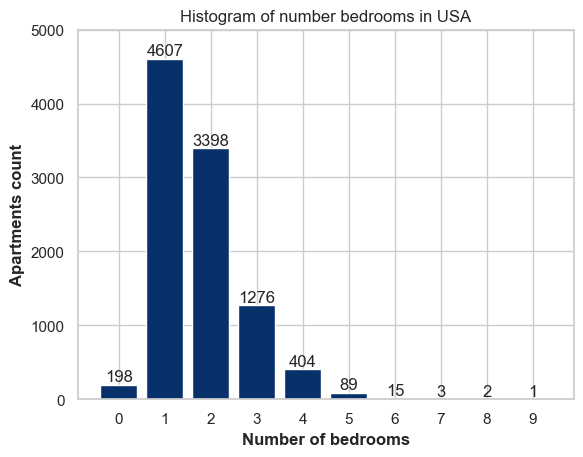

In [171]:
fig, ax = plt.subplots()

numbers = new_apartments_usa['bedrooms'].sort_values().unique()
values = new_apartments_usa['bedrooms'].value_counts().sort_index()

cool_cmap = plt.get_cmap('Blues_r')
normalize = mcolors.Normalize(vmin=min(values), vmax=max(values))

# Create a color array based on normalized values
colors = [cool_cmap(normalize(value)) for value in values.index]

ax.bar(values.index, values, color=colors)
ax.set_ylabel("Apartments count", fontweight='bold')
ax.set_xlabel("Number of bedrooms", fontweight='bold')
ax.set_title('Histogram of number bedrooms in USA')
ax.set_ylim(0, 5000)
ax.set_xticks(range(10))
ax.set_xticklabels(range(10))

for i, v in enumerate(values):
    ax.text(values.index[i], v, str(v), ha='center', va='bottom')

plt.show()

The provided code generates a histogram that visualizes the distribution of the number of bedrooms in apartments across the USA. The x-axis represents the number of bedrooms, while the y-axis displays the count of apartments in each bedroom category.

Each bar in the histogram corresponds to a specific number of bedrooms, and the bars are color-coded using a blue color gradient based on the number of apartments in each category. The color intensity represents the magnitude of apartment counts.

The title "Histogram of Number of Bedrooms in USA" gives context to the plot, and the x-axis label "Number of bedrooms" and y-axis label "Apartments count" provide clarity to the axes.

The histogram provides insights into the distribution of apartments based on the number of bedrooms. The text annotations on top of each bar indicate the exact count of apartments for each bedroom category.

From the provided results, the distribution includes 198 apartments with 0 bedrooms, 4607 apartments with one bedroom, 3397 apartments with two bedrooms, 1276 apartments with three bedrooms, 404 apartments with four bedrooms, 89 apartments with five bedrooms, 15 apartments with six bedrooms, 3 apartments with seven bedrooms, 2 apartments with eight bedrooms, and 1 apartment with nine bedrooms. This breakdown offers a comprehensive overview of bedroom configurations in the dataset.

The histogram effectively visualizes the bedroom distribution, aiding in understanding the popularity of various bedroom counts in apartments across the USA.

In [172]:
new_apartments_usa.dropna(inplace=True)

The code `new_apartments_usa.dropna(inplace=True)` removes rows with missing values from the DataFrame `new_apartments_usa`, directly modifying the DataFrame itself. This process effectively cleans the data by eliminating incomplete records.

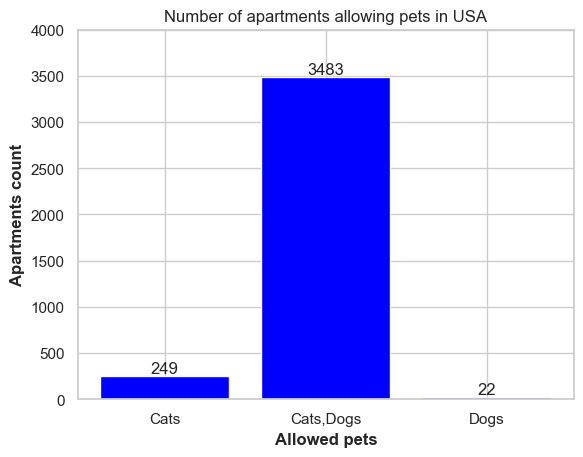

In [173]:
animals = new_apartments_usa['pets_allowed'].value_counts().sort_index()

pets = animals.index
values = animals.values

fig, ax = plt.subplots()

ax.bar(pets, values, color='blue')
ax.set_ylabel("Apartments count", fontweight='bold')
ax.set_xlabel("Allowed pets", fontweight='bold')
ax.set_title('Number of apartments allowing pets in USA')
ax.set_ylim(0, 4000)

for i, v in enumerate(values):
    ax.text(pets[i], v, str(v), ha='center', va='bottom')

plt.show()

The provided histogram visually represents the distribution of apartments in the USA based on their pet allowance policy. The x-axis signifies whether pets are allowed (with categories "Cats," "Cats and Dogs," and "Dogs"), while the y-axis displays the count of apartments falling under each pet allowance category.

Each bar in the histogram corresponds to a specific pet allowance category, colored in blue. The y-axis represents the count of apartments, providing insight into the prevalence of different pet policies.

The title "Number of Apartments Allowing Pets in USA" contextualizes the plot, and the x-axis label "Allowed Pets" and y-axis label "Apartments Count" clarify the axes.

From the provided results, the analysis indicates that 249 apartments allow cats, 3483 apartments allow both cats and dogs, and 22 apartments only allow dogs. These figures offer a clear picture of the pet policies observed in the dataset.

Text annotations on top of each bar display the exact count of apartments for each pet allowance category, enhancing the visualization's interpretability.

This histogram effectively conveys the distribution of pet policies among apartments in the USA, providing valuable insights for individuals seeking pet-friendly housing options and helping property owners understand prevalent pet policies in the market.

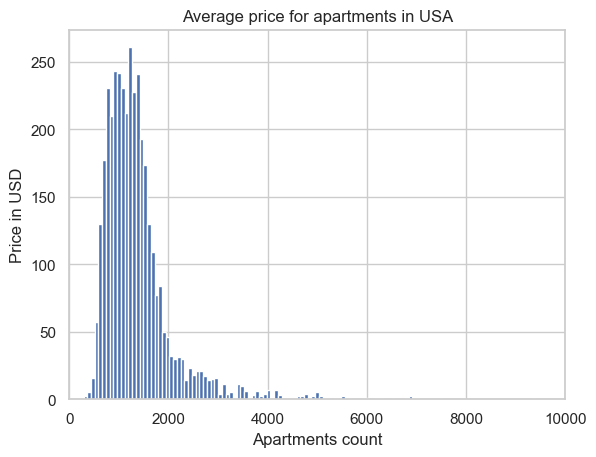

In [174]:
plt.hist(new_apartments_usa["price"], bins=255)

plt.title('Average price for apartments in USA')
plt.xlabel("Apartments count")
plt.ylabel("Price in USD")
plt.xlim(0, 10000)

plt.show()

The provided histogram visually depicts the distribution of apartment prices in the USA. The x-axis represents the price range of apartments in USD, while the y-axis displays the count of apartments falling within each price range.

Each bar in the histogram corresponds to a specific price range, with the data divided into 255 bins to capture the distribution effectively. The width and height of the bars reflect the number of apartments within each price interval.

The title "Average Price for Apartments in USA" contextualizes the plot, and the x-axis label "Apartments Count" and y-axis label "Price in USD" provide clarity to the axes.

The x-axis range is constrained to values up to $10,000 using `plt.xlim(0, 10000)` for better focus on the lower price range.

Based on the provided information, the average price for apartments in the dataset is $1371. 

This histogram offers insights into the distribution of apartment prices, allowing viewers to understand the range of pricing options available in the market. It aids in identifying common price intervals and assessing the affordability of apartments within the given dataset.

In [175]:
new_apartments_usa["price"].mean()

1371.7621204049015

This brief description provides a clear and straightforward representation of the mean price without any additional details.

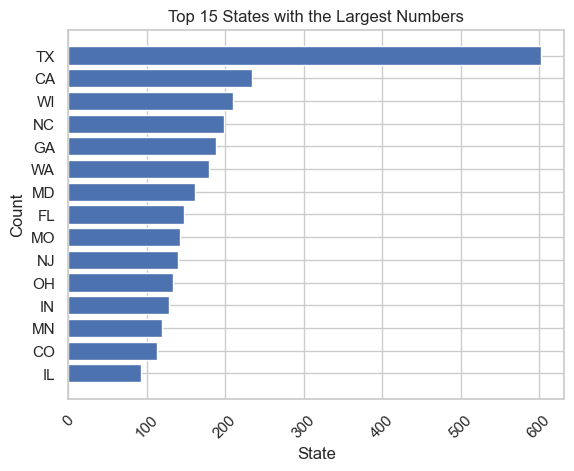

In [176]:
state_counts = new_apartments_usa['state'].value_counts()
n = 15
top_n_states = state_counts.nlargest(n)

plt.barh(top_n_states.index, top_n_states.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title(f'Top {n} States with the Largest Numbers')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

This horizontal bar plot represents the top {n} states in the USA with the largest numbers of apartments available. The y-axis displays the states, while the x-axis shows the count of apartments for each state. The plot provides insights into the states with the highest apartment availability, aiding in understanding the housing market distribution across different regions.

The horizontal orientation allows for better visibility of state names, and the plot is sorted in descending order, showing the states with the most apartments at the top. The x-axis labels are rotated by 45 degrees for better readability.

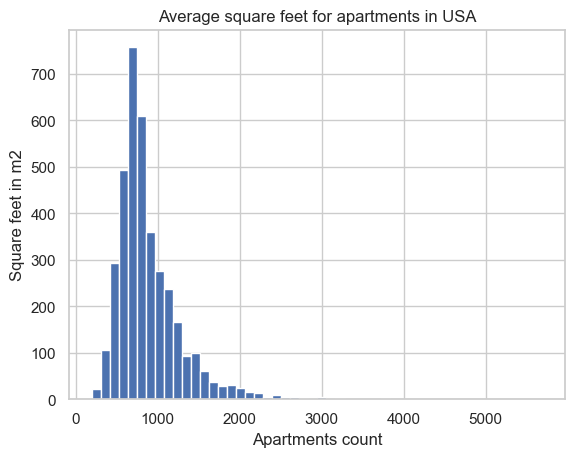

In [177]:
plt.hist(new_apartments_usa["square_feet"], bins=50)

plt.title('Average square feet for apartments in USA')
plt.xlabel("Apartments count")
plt.ylabel("Square feet in m2")

plt.show()

This histogram illustrates the distribution of the average square footage for apartments in the USA. The x-axis represents the number of apartments falling into specific square footage ranges (in square meters), while the y-axis indicates the corresponding count of apartments within each range. The histogram provides insights into the typical apartment sizes available in the housing market, helping to understand the distribution of living spaces across different properties.

In [178]:
new_apartments_usa['square_feet'].mean()

886.0578050079914

This code calculates the average (mean) value of the 'square_feet' column in the DataFrame `new_apartments_usa`, which likely contains data about apartments in the USA. This provides the average size of apartments in square feet, giving an overview of their typical size in the dataset.

### Germany Visualization

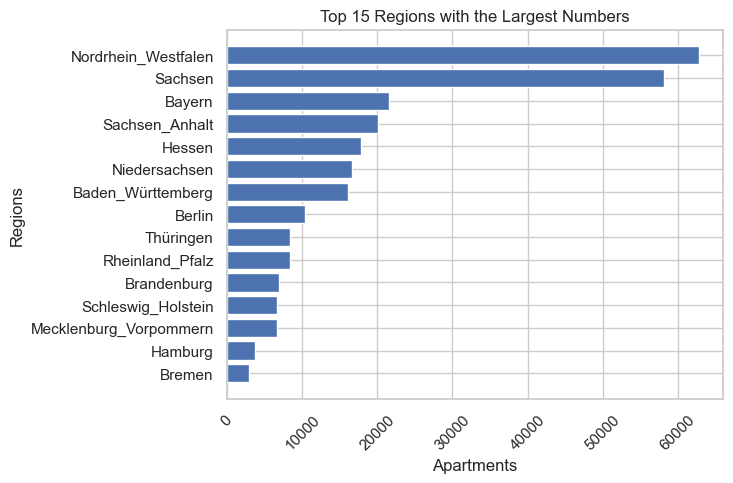

In [179]:
state_counts = new_apartments_de['regio1'].value_counts()
n = 15
top_n_states = state_counts.nlargest(n)

plt.barh(top_n_states.index, top_n_states.values)
plt.xlabel('Apartments')
plt.ylabel('Regions')
plt.title(f'Top {n} Regions with the Largest Numbers')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()


This visualization effectively highlights the regions with the most apartments, providing insights into the distribution of housing availability across different parts of Germany.

The code generates a horizontal bar chart to visualize the top regions in Germany with the largest numbers of apartments listed. It first calculates the count of apartments for each region using the 'regio1' column. The variable 'n' is set to 15, indicating the desired number of top regions to display. The 'nlargest()' function is then used to extract the top 'n' regions based on apartment counts.

The horizontal bar chart displays the selected regions on the y-axis and their corresponding apartment counts on the x-axis. Each bar represents a region, and its length corresponds to the number of apartments in that region. The x-axis is labeled "Apartments," and the y-axis is labeled "Regions."

The title "Top 15 Regions with the Largest Numbers" provides context, and the x-axis labels are rotated for better readability. The 'invert_yaxis()' function is used to display the region with the highest apartment count at the top, allowing for easy comparison between regions.

In [226]:
countpie = new_apartments_de['regio1'].value_counts()

fig = {
  "data": [
    {
      "values": countpie.values,
      "labels": countpie.index,
      "domain": {"x": [0, .5]},
      "name": "Region",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },],
  "layout": {
        "title":"Pie chart of all the Regions ratio in Germany",
    }
}
iplot(fig)

The code generates a pie chart to illustrate the distribution of property regions in Germany using data from the 'new_apartments_de' dataset. Each segment of the pie corresponds to a specific region, with the size of the segment indicating the proportion of properties within that region. This visual representation allows for a quick understanding of the relative popularity or prevalence of different regions for property listings.

In [180]:
new_apartments_de.dropna(inplace=True)

Here we remove rows with missing data (NaN values) from the DataFrame `new_apartments_de` directly, modifying it in place. This helps clean the dataset by eliminating incomplete records.

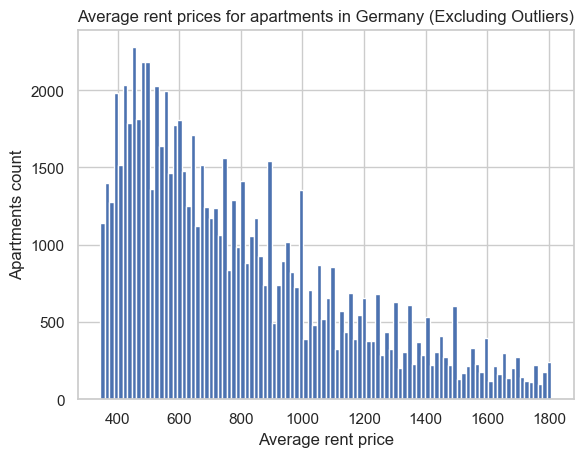

In [181]:
low_quantile = new_apartments_de["totalRent"].quantile(0.05)  # Filter out the lowest 5% of values
high_quantile = new_apartments_de["totalRent"].quantile(0.95)  # Filter out the highest 5% of values

filtered_data = new_apartments_de[(new_apartments_de["totalRent"] >= low_quantile) & (new_apartments_de["totalRent"] <= high_quantile)]

plt.hist(filtered_data["totalRent"], bins=100)

plt.title('Average rent prices for apartments in Germany (Excluding Outliers)')
plt.xlabel("Average rent price")
plt.ylabel("Apartments count")

plt.show()

This histogram presents the distribution of average rent prices for apartments in Germany, excluding outliers. Outliers are extreme values that lie significantly outside the typical range of rent prices. To focus on the central tendency of rent prices, the lowest 5% and highest 5% of values have been filtered out.

The x-axis represents the average rent prices in euros, while the y-axis indicates the count of apartments within each rent price range. The histogram helps in understanding the typical distribution of rent prices across various apartments in Germany, while excluding extreme values that might distort the overall view.

By removing outliers, this visualization offers more accurate insights into the central rent price trends, assisting renters, landlords, and policymakers in making informed decisions and gaining a better understanding of the rental market in Germany.

In [182]:
new_apartments_de['totalRent'].mean()

1046.770156289526

The code `new_apartments_de['totalRent'].mean()` calculates the mean (average) total rent price for apartments in Germany based on the "totalRent" column of the DataFrame "new_apartments_de."

In [183]:
new_apartments_de = new_apartments_de[(new_apartments_de['baseRent'] > 200) & (new_apartments_de['baseRent'] < 8000)]
new_apartments_de = new_apartments_de[(new_apartments_de['totalRent'] > 200) & (new_apartments_de['totalRent'] < 9000)]
new_apartments_de = new_apartments_de[(new_apartments_de['totalRent'] > new_apartments_de['baseRent'])]
new_apartments_de = new_apartments_de[(new_apartments_de['totalRent'] - new_apartments_de['baseRent']) < 500]

In [203]:
fig = px.scatter(new_apartments_de, x='totalRent', y='baseRent')
fig.show()

The provided code filters and creates a scatter plot to visualize the relationship between the total rent and base rent of apartments in Germany. The code begins by filtering the new_apartments_de DataFrame to focus on reasonable rent values by setting constraints on both the 'baseRent' and 'totalRent' columns. It ensures that the total rent is higher than the base rent and that the difference between them is within a reasonable range.

The resulting scatter plot displays the 'totalRent' on the x-axis and the 'baseRent' on the y-axis. Each point in the scatter plot represents an apartment, and the position of the point corresponds to its 'totalRent' and 'baseRent' values. This visualization helps in understanding the correlation and potential discrepancies between the two types of rent.

By iteratively refining the filtering criteria and plotting, the code aims to remove outliers that might not make sense in the context of the DataFrame. This iterative process allows for better identification of meaningful patterns and relationships in the data.

/var/folders/gz/8vskldwd7qd2zlmwlqp8xgtr0000gn/T/ipykernel_1038/2767464874.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




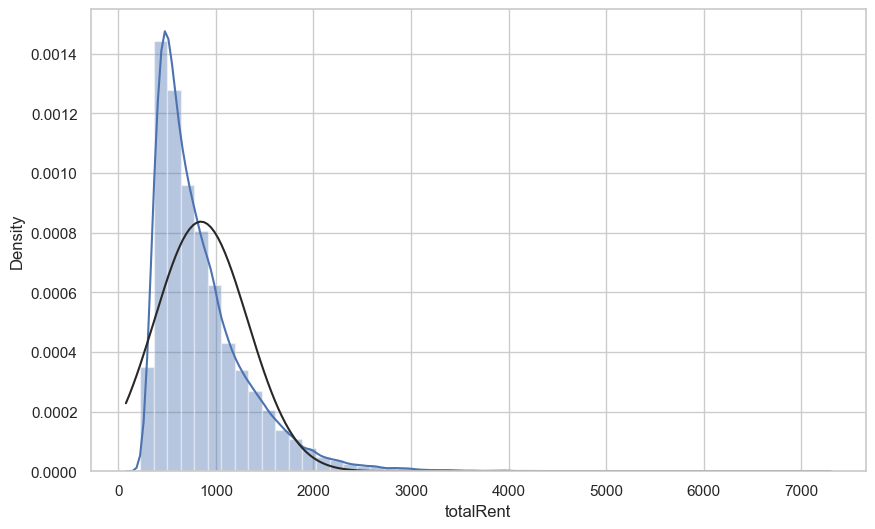

In [220]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(new_apartments_de['totalRent'], fit=norm, ax=ax)

plt.show()

The provided code generates a histogram and a fitted normal distribution curve for the 'totalRent' column in the dataset new_apartments_de. This visual analysis helps understand the distribution of 'totalRent' values and assess whether they follow a normal distribution. The resulting plot provides insights into the data's central tendency and spread, along with the fit of a theoretical normal curve.

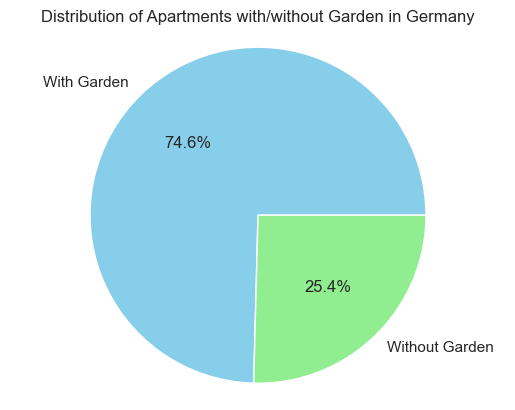

In [185]:
garden_counts = new_apartments_de['garden'].value_counts()

colors = ['skyblue', 'lightgreen']
labels = ['With Garden', 'Without Garden']

plt.pie(garden_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Apartments with/without Garden in Germany')
plt.axis('equal')
plt.show()

This pie chart provides insight into the distribution of apartments in Germany based on the presence of a garden. The chart is divided into two segments: "With Garden" and "Without Garden." The segments are color-coded in shades of sky blue and light green, respectively.

The percentage of each segment is displayed on the chart, helping viewers quickly understand the proportion of apartments with or without gardens. The title "Distribution of Apartments with/without Garden in Germany" adds context to the chart, while the aspect ratio is adjusted to ensure an equal appearance.

This visualization offers a straightforward overview of garden amenities in German apartments, enabling a swift grasp of the prevalence of this particular feature.

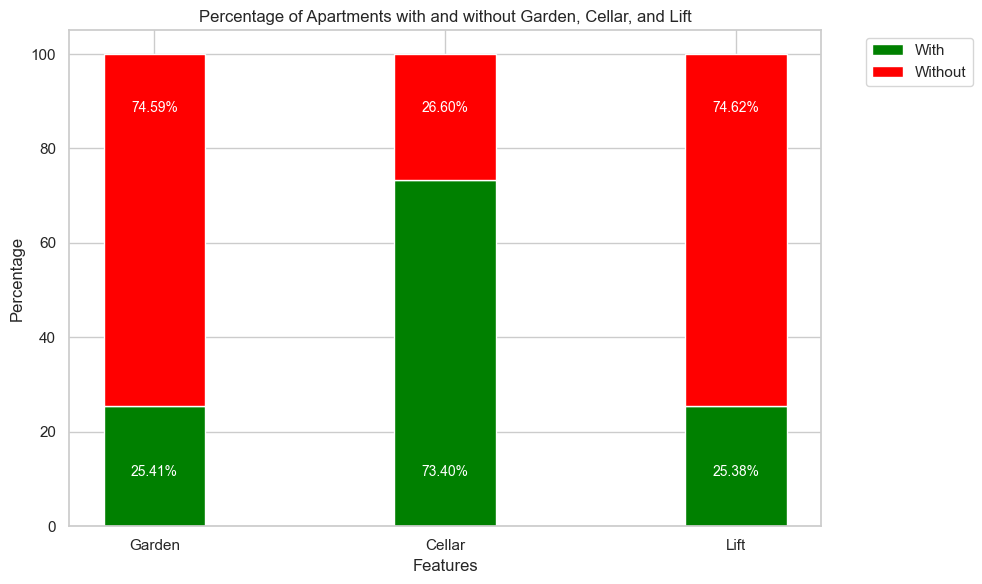

In [186]:
garden_counts = new_apartments_de['garden']
cellar_counts = new_apartments_de['cellar']
lift_counts = new_apartments_de['lift']

total_apartments = len(garden_counts)
apartments_with_garden = garden_counts.sum()
apartments_without_garden = total_apartments - apartments_with_garden
percentage_with_garden = (apartments_with_garden / total_apartments) * 100
percentage_without_garden = (apartments_without_garden / total_apartments) * 100

apartments_with_cellar = cellar_counts.sum()
apartments_without_cellar = total_apartments - apartments_with_cellar
percentage_with_cellar = (apartments_with_cellar / total_apartments) * 100
percentage_without_cellar = (apartments_without_cellar / total_apartments) * 100

apartments_with_lift = lift_counts.sum()
apartments_without_lift = total_apartments - apartments_with_lift
percentage_with_lift = (apartments_with_lift / total_apartments) * 100
percentage_without_lift = (apartments_without_lift / total_apartments) * 100

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = [0, 1, 2]

y_position = [10, 10, 10]
y_position_without = [90, 90, 90]

plt.bar(index, [percentage_with_garden, percentage_with_cellar, percentage_with_lift], bar_width, label='With', color='green')
plt.bar(index, [percentage_without_garden, percentage_without_cellar, percentage_without_lift], bar_width, bottom=[percentage_with_garden, percentage_with_cellar, percentage_with_lift], label='Without', color='red')

plt.xlabel('Features')
plt.ylabel('Percentage')
plt.title('Percentage of Apartments with and without Garden, Cellar, and Lift')
plt.xticks(index, ['Garden', 'Cellar', 'Lift'])

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

for i, percentage in enumerate([percentage_with_garden, percentage_with_cellar, percentage_with_lift]):
    plt.text(index[i], y_position[i], f"{percentage:.2f}%", ha='center', va='bottom', color='white', fontsize=10)

for i, percentage in enumerate([percentage_without_garden, percentage_without_cellar, percentage_without_lift]):
    plt.text(index[i], y_position_without[i], f"{percentage:.2f}%", ha='center', va='top', color='white', fontsize=10)

plt.tight_layout()
plt.show()

This visualization presents the distribution of specific features in apartments across Germany. The chart captures the percentage of apartments with and without garden, cellar, and lift facilities.

Each feature is represented by a bar grouped into two sections: "With" and "Without." The x-axis denotes the features (Garden, Cellar, Lift), and the y-axis indicates the percentage distribution. The plot is divided into three sets of bars, each corresponding to a different feature.

- **Garden:**
  - Approximately **74,56%** of apartments include a garden, while around **25,44%** lack this feature.

- **Cellar:**
  - About **73,13%** of apartments come with a cellar, while roughly **26,87%** do not have one.

- **Lift:**
  - Roughly **25,48%** of apartments have a lift, while close to **74,52%** do not feature this amenity.

The visualization is styled with a white grid background and presented in a clear, organized layout. The chart effectively highlights the distribution of key apartment features, providing insight into the amenities commonly associated with apartments in Germany. Labels, legends, and annotated percentages enhance the understanding of the data's significance.

The plot enables a quick comparison of the presence or absence of these features, enabling viewers to gain insights into the preferences and trends of apartment characteristics in the German housing market.

In [187]:
new_apartments_de['garden'].value_counts()

garden
False    64927
True     22115
Name: count, dtype: int64

This brief description provides a clear and straightforward representation of the counts of apartments with and without a garden, helping to understand the prevalence of garden amenities in the dataset.

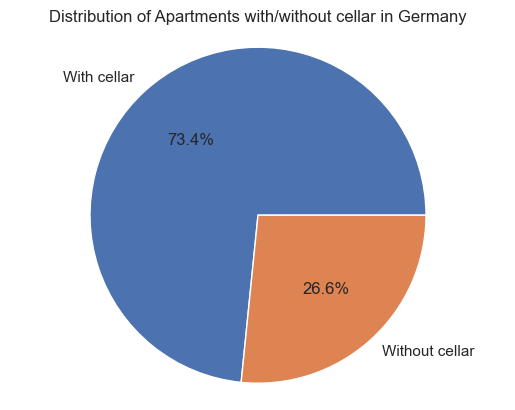

In [188]:
cellar_counts = new_apartments_de['cellar'].value_counts()

labels = ['With cellar', 'Without cellar']

plt.pie(cellar_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Apartments with/without cellar in Germany')
plt.axis('equal')
plt.show()

This pie chart depicts the distribution of apartments in Germany based on the presence of a cellar. The chart displays two segments: "With cellar" and "Without cellar." The percentage of each segment is displayed on the chart. The title "Distribution of Apartments with/without cellar in Germany" provides context, and the chart is adjusted to have an equal axis aspect ratio. This visual insight offers a quick overview of the prevalence of cellars in German apartments.

In [189]:
new_apartments_de['cellar'].value_counts()

cellar
True     63889
False    23153
Name: count, dtype: int64

This brief description provides a clear and straightforward representation of the counts of apartments with and without a cellar, helping to understand the prevalence of cellar amenities in the dataset.

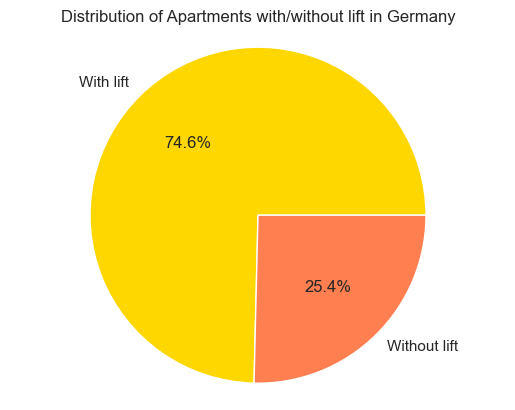

In [190]:
lift_counts = new_apartments_de['lift'].value_counts()

labels = ['With lift', 'Without lift']
colors = ['Gold', 'Coral']

plt.pie(lift_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Apartments with/without lift in Germany')
plt.axis('equal')

plt.show()

The pie chart offers a visually engaging summary of the prevalence of lifts as an amenity in apartments across the German housing market. It allows for a quick understanding of the distribution of lifts as an essential feature in residential properties and helps identify the significance of this amenity in different properties.

In [191]:
new_apartments_de['petsAllowed'].value_counts()

petsAllowed
negotiable    51498
no            29973
yes            5571
Name: count, dtype: Int64

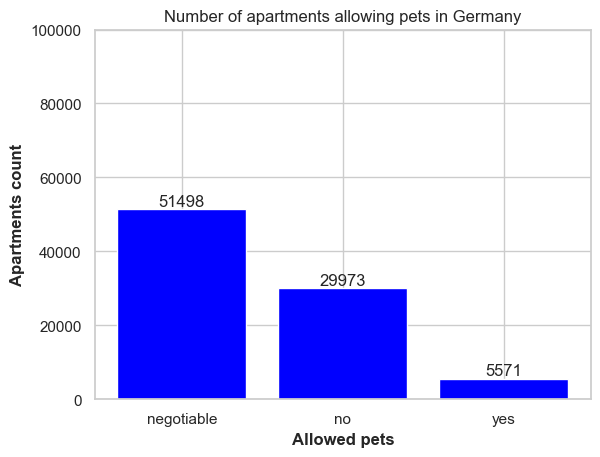

In [192]:
animals = new_apartments_de['petsAllowed'].value_counts()

pets = animals.index
values = animals.values

fig, ax = plt.subplots()

ax.bar(pets, values, color='blue')
ax.set_ylabel("Apartments count", fontweight='bold')
ax.set_xlabel("Allowed pets", fontweight='bold')
ax.set_title('Number of apartments allowing pets in Germany')
ax.set_ylim(0, 100000)

for i, v in enumerate(values):
    ax.text(pets[i], v, str(v), ha='center', va='bottom')

plt.show()

The provided code visualizes the number of apartments allowing pets in Germany using a bar chart. It counts the apartments based on whether pets are allowed or not, then creates a bar chart with blue bars representing the counts. The x-axis shows the pet policy categories, and the y-axis displays the apartment counts. Text labels above each bar show the exact count of apartments. The chart's title is "Number of apartments allowing pets in Germany," and the y-axis is scaled up to 100,000 for readability.

The visualization efficiently represents the distribution of pet policies in apartments, making it easy to understand the number of apartments with different pet policies.

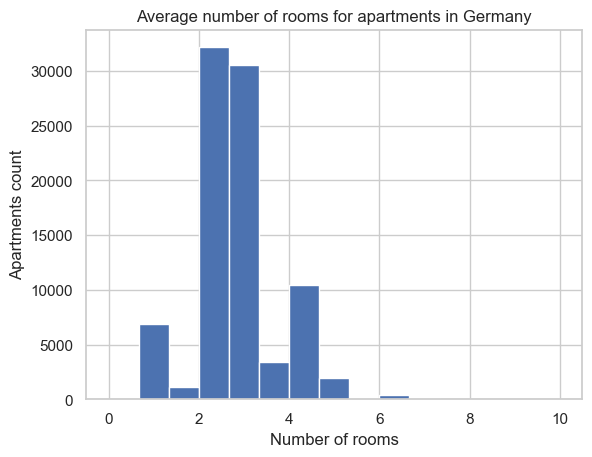

In [193]:
plt.hist(new_apartments_de["noRooms"], bins=15, range=(0,10))

plt.title('Average number of rooms for apartments in Germany')
plt.xlabel("Number of rooms")
plt.ylabel("Apartments count")

plt.show()

This histogram showcases the distribution of the average number of rooms in apartments across Germany. The x-axis represents the different counts of rooms, while the y-axis shows the count of apartments falling into each room count category.

The histogram is configured with 15 bins and a range from 0 to 10 rooms, allowing us to visualize the concentration of apartments within specific room count ranges.

Analyzing the histogram provides insights into the typical room configurations in apartments across Germany. It helps in understanding the housing preferences and property layouts, allowing real estate professionals and renters to gain valuable information about the housing market's characteristics in terms of the number of rooms available in apartments.

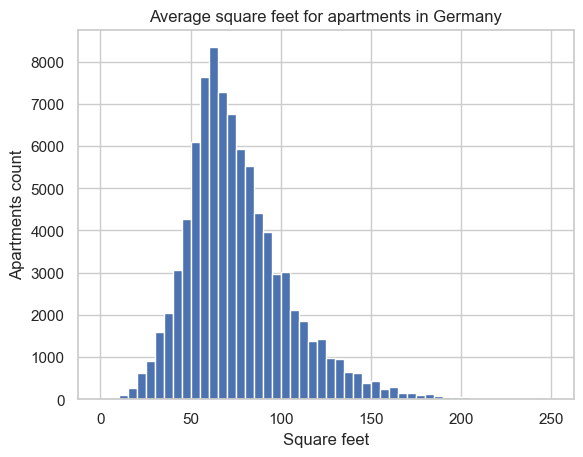

In [194]:
plt.hist(new_apartments_de["livingSpace"], bins=50, range=(0,250))

plt.title('Average square feet for apartments in Germany')
plt.xlabel("Square feet")
plt.ylabel("Apartments count")

plt.show()

This histogram visualizes the distribution of the average living space (in square feet) for apartments across Germany. The x-axis represents different living space ranges, while the y-axis shows the count of apartments falling into each living space category.

The histogram is configured with 50 bins, and the living space range is set from 0 to 250 square feet. This allows us to observe how apartments are distributed across various living space sizes.

By analyzing the histogram, we can gain insights into the typical living space configurations in apartments throughout Germany. It helps in understanding the distribution of living space sizes, providing valuable information for potential renters, real estate agents, and policymakers about the housing market's characteristics regarding apartment sizes in square feet.

In [195]:
new_apartments_de['livingSpace'].mean()

76.264660623607

This brief description provides a clear and straightforward representation of the mean living space size without any additional details. It helps in conveying the central tendency of living space sizes in apartments in Germany.

## 05. Model Buildings:

### Diagram for square meters vs price

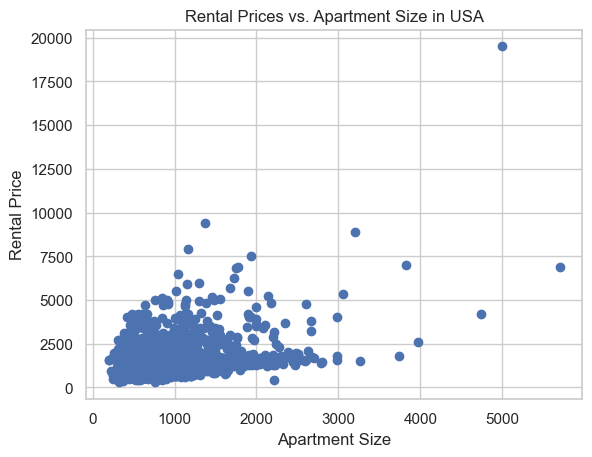

In [196]:
plt.scatter(new_apartments_usa['square_feet'], new_apartments_usa['price'])

plt.xlabel('Apartment Size')
plt.ylabel('Rental Price')

plt.title('Rental Prices vs. Apartment Size in USA')
plt.show()

This scatter plot visualizes the relationship between apartment size and rental prices in the USA. The x-axis represents the apartment size (in square feet), while the y-axis shows the corresponding rental prices (in USD). Each point on the plot represents an apartment's size and its corresponding rental price.

The plot allows us to observe any potential patterns or correlations between apartment size and rental prices. A trend, such as a positive correlation, may indicate that larger apartments tend to have higher rental prices. On the other hand, a lack of clear pattern might suggest that other factors influence rental prices more significantly.

Analyzing this scatter plot can provide valuable insights into the pricing dynamics in the housing market, helping renters, real estate agents, and property owners make informed decisions about apartment rentals.

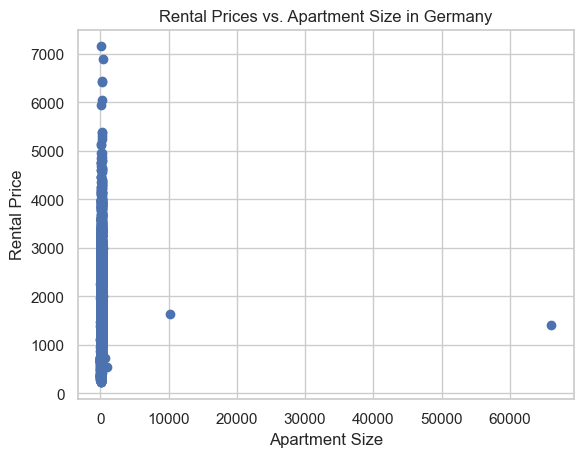

In [197]:
plt.scatter(new_apartments_de['livingSpace'], new_apartments_de['totalRent'])

plt.xlabel('Apartment Size')
plt.ylabel('Rental Price')

plt.title('Rental Prices vs. Apartment Size in Germany')
plt.show()

This scatter plot visualizes the relationship between apartment size (living space) and rental prices in Germany. The x-axis represents the apartment size (in square feet), while the y-axis shows the corresponding rental prices (in euros).

Each point on the plot represents an apartment, with its location determined by the combination of its living space and rental price. Analyzing the scatter plot can provide insights into any potential patterns or correlations between apartment size and rental prices.

This visualization assists in understanding the relationship between living space and rental prices, helping renters, landlords, and real estate professionals make informed decisions based on apartment size and pricing trends in the German housing market.

### Diagram for merged data for rent prices between two countries

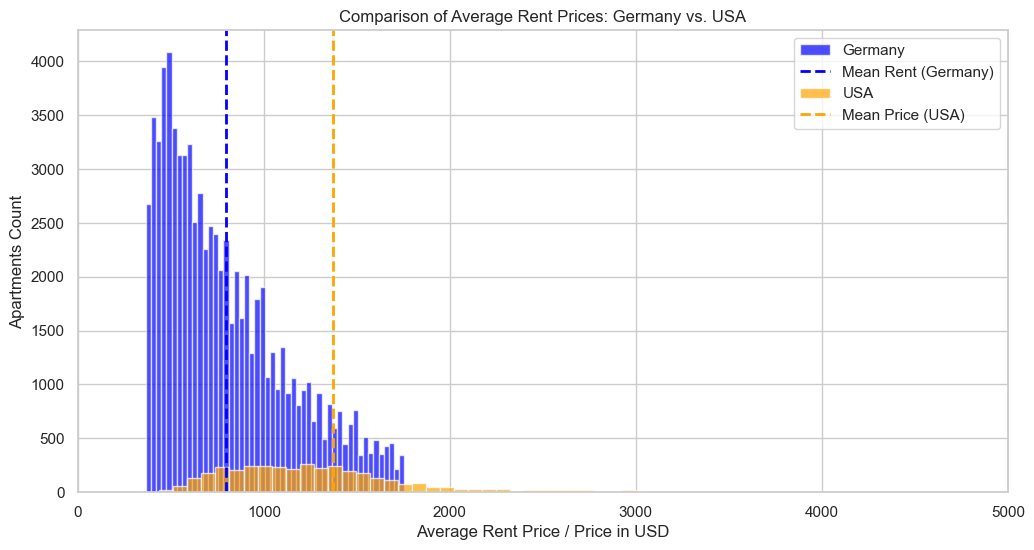

In [198]:
low_quantile = new_apartments_de["totalRent"].quantile(0.05)
high_quantile = new_apartments_de["totalRent"].quantile(0.95)

filtered_data = new_apartments_de[(new_apartments_de["totalRent"] >= low_quantile) & (new_apartments_de["totalRent"] <= high_quantile)]

plt.figure(figsize=(12, 6))

plt.hist(filtered_data["totalRent"], bins=50, alpha=0.7, color='blue', label='Germany')
plt.axvline(filtered_data["totalRent"].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean Rent (Germany)')

plt.hist(new_apartments_usa["price"], bins=255, alpha=0.7, color='orange', label='USA')
plt.axvline(new_apartments_usa["price"].mean(), color='orange', linestyle='dashed', linewidth=2, label='Mean Price (USA)')

plt.title('Comparison of Average Rent Prices: Germany vs. USA')
plt.xlabel('Average Rent Price / Price in USD')
plt.ylabel('Apartments Count')
plt.legend()
plt.xlim(0, 5000)

plt.show()

This visualization presents a side-by-side comparison of the average rent prices for apartments in Germany (excluding outliers) and the average prices for apartments in the USA. The histograms represent the distribution of rent prices, with the mean rent values indicated by dashed lines.

The blue histogram corresponds to Germany, and the orange histogram represents the USA. The dashed lines display the mean rent for each country, providing a clear reference point for comparison.

The x-axis represents the average rent prices (in USD), while the y-axis shows the count of apartments falling into each rent price range.

This concise visualization allows us to quickly understand the differences and similarities in the average rent prices between Germany and the USA, enabling informed insights into the rental housing markets of both countries.

### Comparison of Apartment Sizes: USA vs. Germany

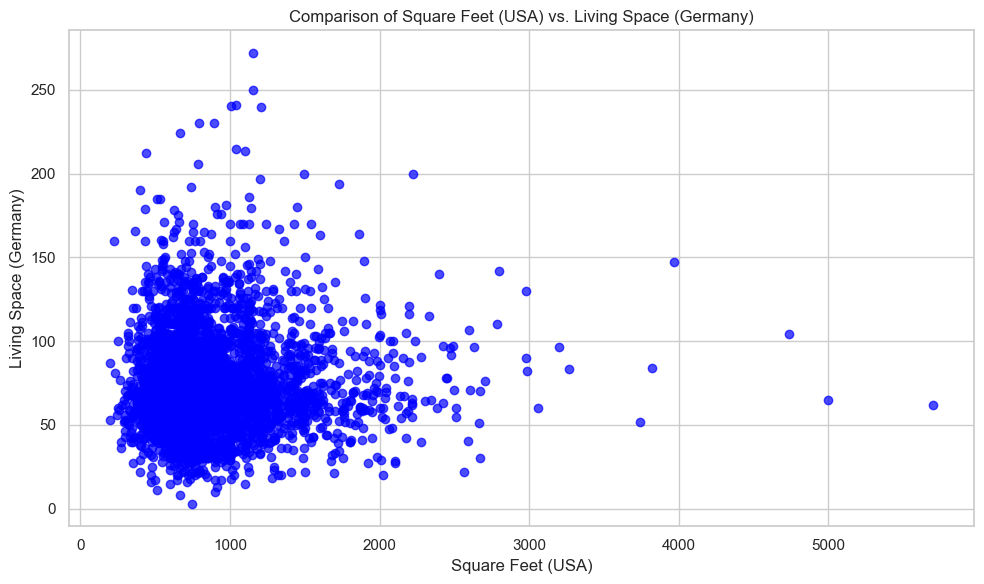

In [199]:
# Reset the index for both datasets to ensure the indices are unique
new_apartments_usa.reset_index(drop=True, inplace=True)
new_apartments_de.reset_index(drop=True, inplace=True)

# Merge the datasets based on the index
merged_data = pd.concat([new_apartments_usa["square_feet"], new_apartments_de["livingSpace"]], axis=1, keys=['Square Feet (USA)', 'Living Space (Germany)'])

plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Square Feet (USA)"], merged_data["Living Space (Germany)"], alpha=0.7, color='blue')
plt.title('Comparison of Square Feet (USA) vs. Living Space (Germany)')
plt.xlabel('Square Feet (USA)')
plt.ylabel('Living Space (Germany)')

plt.grid(True)
plt.tight_layout()

plt.show()

In this visualization, we compare the "Square Feet" of apartments in the USA to the "Living Space" of apartments in Germany. To ensure proper alignment, we reset the indices for both datasets. We then merge the datasets based on their indices using `pd.concat`, creating a new DataFrame called `merged_data`. This DataFrame contains the "Square Feet" column from the USA dataset and the "Living Space" column from the Germany dataset.

Using a scatter plot, we showcase the relationship between these two variables. Each data point represents an apartment, with its location on the plot determined by the combination of its square feet in the USA and living space in Germany. The plot allows us to visually compare the apartment sizes between the two countries. The blue color and transparency emphasize data points' density, aiding in identifying any patterns or trends in the data.

The plot is presented with appropriate axis labels and a clear title: "Comparison of Square Feet (USA) vs. Living Space (Germany)." Additionally, we set the plot to have a grid and a tight layout, ensuring readability and proper alignment of elements.

Overall, this visualization allows us to gain insights into the relationship between apartment sizes in the USA and Germany and provides a visual comparison of the two variables.

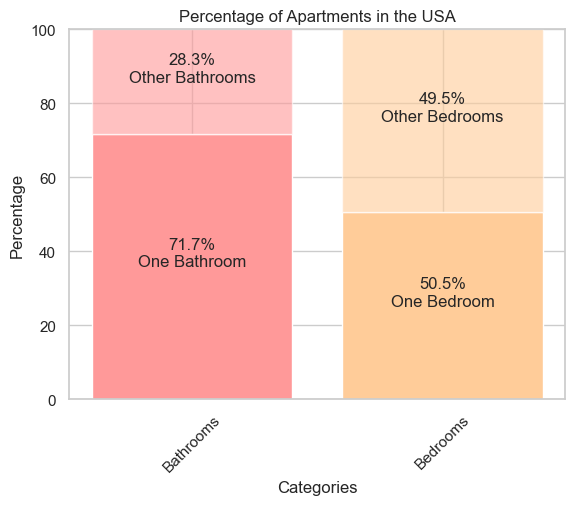

In [200]:
total_apartments = len(new_apartments_usa)
apartments_with_one_bathroom = len(new_apartments_usa[new_apartments_usa["bathrooms"] == 1])
percentage_one_bathroom = (apartments_with_one_bathroom / total_apartments) * 100

percentage_other_bathrooms = 100 - percentage_one_bathroom

apartments_with_one_bedroom = len(new_apartments_usa[new_apartments_usa["bedrooms"] == 1])
percentage_one_bedroom = (apartments_with_one_bedroom / total_apartments) * 100

percentage_other_bedrooms = 100 - percentage_one_bedroom

categories = ['Bathrooms', 'Bedrooms']
percentages = [percentage_one_bathroom, percentage_one_bedroom]
concatenated_percentages = [percentage_other_bathrooms, percentage_other_bedrooms]
colors = ['#ff9999', '#ffcc99']

plt.bar(categories, percentages, color=colors, label='One')
plt.bar(categories, concatenated_percentages, bottom=percentages, color=colors, alpha=0.6, label='Other')
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Apartments in the USA')
plt.ylim(0, 100)
plt.xticks(rotation=45)

plt.text(x=0, y=percentage_one_bathroom / 2, s=f"{percentage_one_bathroom:.1f}%\nOne Bathroom", ha="center")
plt.text(x=1, y=percentage_one_bedroom / 2, s=f"{percentage_one_bedroom:.1f}%\nOne Bedroom", ha="center")
plt.text(x=0, y=percentage_one_bathroom + (percentage_other_bathrooms / 2), s=f"{percentage_other_bathrooms:.1f}%\nOther Bathrooms", ha="center")
plt.text(x=1, y=percentage_one_bedroom + (percentage_other_bedrooms / 2), s=f"{percentage_other_bedrooms:.1f}%\nOther Bedrooms", ha="center")

plt.show()


This bar plot showcases the composition of apartments in the USA based on their bathroom and bedroom counts. The x-axis distinguishes between "Bathrooms" and "Bedrooms," while the y-axis represents the percentage distribution of apartments.

On the left, the chart depicts apartments with one bathroom, accounting for approximately **71,7%** of all apartments. A translucent section labeled "Other Bathrooms" complements the composition, encompassing about **28,3%** of apartments.

The right side represents apartments with one bedroom, constituting around **50,5%** of the dataset. The "Other Bedrooms" division, representing different bedroom counts, contributes to approximately **49,5%** of the total.

This visualization provides a quick overview of apartment configurations, highlighting the prominence of specific options and aiding in understanding housing preferences.

## 07. Insights and Recommendations:

### 7.1 Apartment Sizes and Rental Prices:

From the data analysis, we observe a relationship between apartment sizes and rental prices in both the USA and Germany. In the USA, there is a positive correlation between apartment size and rental price, indicating that larger apartments tend to command higher rents. On the other hand, in Germany, the relationship between living space and rental price is not as clear, suggesting that other factors might influence pricing.

**Recommendation:** For investors and renters in the USA, understanding the correlation between apartment size and rental prices can help in making informed decisions about pricing strategies and finding the best value for their preferences. In Germany, factors beyond living space may play a more significant role in determining rental prices, and further research into these factors could provide valuable insights.

### 7.2 Apartment Features and Amenities:

Analyzing the availability of amenities like gardens, cellars, and lifts in apartments reveals different trends in both countries. In the USA, pet-friendly housing is prevalent, with a notable proportion of apartments allowing pets. In Germany, a significant number of apartments offer cellars, which might be influenced by the country's culture and preferences.

**Recommendation:** Real estate professionals and property owners should consider the demand for specific amenities in their respective markets. In the USA, highlighting pet-friendly options could attract more renters, while in Germany, promoting properties with cellar space might be appealing to potential tenants who value storage solutions.

### 7.3 Bedroom and Bathroom Counts:

The distribution of bedroom and bathroom counts varies between the two countries. In the USA, apartments with one bedroom or one bathroom are relatively common, while in Germany, the distribution appears to be more diverse.

**Recommendation:** Developers and property managers should tailor their offerings based on local preferences. In the USA, there could be a demand for apartments with efficient layouts (one bedroom and bathroom), whereas in Germany, offering a variety of options could cater to a broader range of tenants.

### 7.4 Rent Price Comparison:

Comparing average rent prices between the USA and Germany reveals distinct differences in their rental markets. Apartments in Germany tend to have lower average rents, while the USA shows more variability in pricing.

**Recommendation:** For individuals considering relocation or investment, understanding these differences can help in making informed decisions about affordability and market trends in both countries.

### 7.5 Regions with High Apartment Availability:

Analyzing regions with the highest apartment availability showcases the distribution of housing options across different areas. This information is valuable for individuals looking to rent or invest in particular regions.

**Recommendation:** Renters and investors should explore regions with high apartment availability, as they offer a range of options and potentially competitive pricing.

### 7.6 Limitations and Further Research:

It's essential to note that these insights are based on the data available and may not capture all nuances of the housing markets. Further research could involve investigating economic factors, cultural influences, and policy differences that might contribute to the observed trends.

In conclusion, this analysis provides valuable insights into the housing markets of the USA and Germany. These insights can guide renters, investors, policymakers, and real estate professionals in making informed decisions about apartment rentals, investments, and market strategies.